In [49]:
from sklearn.datasets import load_digits


In [2]:
class LCG:
    def __init__(self, m, a, c, seed):
        self.m = m
        self.a = a
        self.c = c
        self.seed = seed

    def random(self):
        self.seed = (self.a * self.seed + self.c) % self.m
        return self.seed / self.m

In [27]:
import math

In [3]:
lcg = LCG(2**31-1, 106542, 12342986, 42)   

In [14]:
lcg.random()

0.30150507590803555

In [15]:
m = 30
mr = []
for i in range(20):
    m = m - 0.1*m
    mr.append(m)
print(mr)


[27.0, 24.3, 21.87, 19.683, 17.7147, 15.94323, 14.348907, 12.9140163, 11.62261467, 10.460353203, 9.4143178827, 8.47288609443, 7.625597484987001, 6.863037736488301, 6.176733962839471, 5.559060566555524, 5.0031545098999715, 4.5028390589099745, 4.052555153018977, 3.6472996377170794]


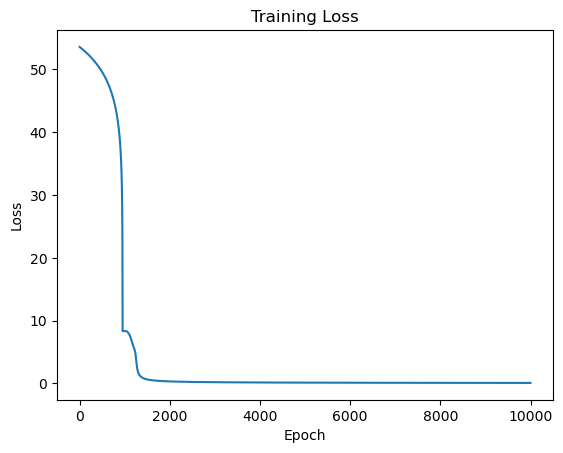

Final predictions:
Input: [0, 0], Predicted: 0.0047
Input: [1, 1], Predicted: 0.0117
Input: [0, 1], Predicted: 0.9905
Input: [1, 0], Predicted: 0.9904
Input: [0, 1], Predicted: 0.9905
Input: [0, 0], Predicted: 0.0047


In [ ]:
import math
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def floss(yp,yi):
    return -(yi*math.log(yp) + (1-yi)*math.log(1-yp))

def dsigmoid_d(x):
    return math.exp(-x)/((1+math.exp(-x))**2)

def dot(a, b):
    return sum(x * y for x, y in zip(a, b))

class Layer:
    def __init__(self, input_size, output_size):
        self.weights = [[lcg.random() for _ in range(input_size)] for _ in range(output_size)]
        self.biases = [lcg.random() for _ in range(output_size)]
        self.last_input = []
        self.last_z = []
        self.last_activation = []

    def forward(self, input_vector):
        self.last_input = input_vector
        # Using linear model to compute
        self.last_z = [dot(self.weights[i], input_vector) + self.biases[i] for i in range(len(self.weights))]
        # Using activation function for generate the value of each neuron in the hidden layer, represented as one tuple
        self.last_activation = [sigmoid(z) for z in self.last_z]
        return self.last_activation

    def backward(self, output_error, learning_rate, next_layer_weights=None, next_layer_deltas=None):
        # Gradient
        deltas = []
        for i in range(len(self.last_activation)):
            if next_layer_weights is None:
            # The loss rate of the final output
                loss = output_error[i]
            else:
            # A tuple contains loss rate of the next layer neuron to the previous layer neuron
                loss = sum(next_layer_weights[j][i] * next_layer_deltas[j] for j in range(len(next_layer_deltas)))
            # Gradient descending
            delta = loss * dsigmoid_d(self.last_z[i])
            deltas.append(delta)
            for j in range(len(self.last_input)):
                self.weights[i][j] = self.weights[i][j] - learning_rate * delta * self.last_input[j]
            self.biases[i] = self.biases[i] - learning_rate * delta
        return deltas

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = Layer(input_size, hidden_size)
        self.output_layer = Layer(hidden_size, output_size)

    def predict(self, input_vector):
        hidden_output = self.hidden_layer.forward(input_vector)
        output = self.output_layer.forward(hidden_output)
        return output

    def train(self, X, Y, epochs=10000, learning_rate=0.5):
        losses = []
        for epoch in range(epochs):
            loss = 0
            for x, y in zip(X, Y):
                # Forward pass
                hidden_output = self.hidden_layer.forward(x)
                output = self.output_layer.forward(hidden_output)

                # Compute loss

                #-(y[i]*math.log(output[i]) + (1-y[i])*math.log(1-ouput[i]))
     
                loss += sum(-(y[i]*math.log(output[i]) + (1-y[i])*math.log(1-output[i])) for i in range(len(y)))

                # Backward pass
                output_error = [output[i] - y[i] for i in range(len(y))]
                output_deltas = self.output_layer.backward(output_error, learning_rate)
                self.hidden_layer.backward(output_error, learning_rate, self.output_layer.weights, output_deltas)

            losses.append(loss)

        # Plot training loss
        plt.plot(losses)
        plt.title("Training Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()


    # Predict the output of the Neural Network
    def test(self, X):
        print("Final predictions:")
        for x in X:
            output = self.predict(x)
            print(f"Input: {x}, Predicted: {output[0]:.4f}")

# XOR problem
X = [[0,0], [0,1], [1,0], [1,1],[0,0],[1,0],[0,1],[0,0],[1,1]]
Y = [[0], [1], [1], [0],[0],[1],[1],[0],[0]]
# Test set
X_test = [[0,0],[1,1],[0,1],[1,0],[0,1],[0,0]] 
# Create and train network
nn = NeuralNetwork(input_size=len(X[0]), hidden_size=26, output_size=len(Y[0]))
nn.train(X, Y)
nn.test(X_test)
